In [95]:
import pandas as pd
from pathlib import Path

data_path = Path("./_raw_parquets_smaller/cord19_graphics_v1.parquet")
df = pd.read_parquet(data_path)

In [96]:
df_val = df.loc[df.split_set=="VAL"]
df_val.groupby(["source"])["img"].count() / df_val.shape[0]

source
chart-icpr2020     0.074649
chart-synthetic    0.913156
clef13             0.002772
clef16             0.001663
tinman             0.007761
Name: img, dtype: float64

In [94]:
df_val = df.loc[df.split_set=="VAL"]
df_val.groupby(["label"])["img"].count() / df_val.shape[0]

label
gra.3dr     0.001663
gra.flow    0.000739
gra.his     0.228176
gra.lin     0.230115
gra.oth     0.335612
gra.sca     0.202679
gra.sig     0.001016
Name: img, dtype: float64

In [93]:
from sklearn.metrics import f1_score
from random import choice

labels = df_val.label.unique()
df_val["random"] = df_val.apply(lambda x: choice(labels), axis=1)
f1_score(df_val.label, df_val.random, average="micro")




/tmp/ipykernel_669419/2219063671.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val["random"] = df_val.apply(lambda x: choice(labels), axis=1)


0.143094688221709

In [81]:
train_df = df.loc[df.split_set.isin(["TRAIN", "VAL"])]
train_df.split_set.unique()

array(['TRAIN', 'VAL'], dtype=object)

In [97]:
print(df.width.mean(), df.width.min(), df.width.max())
print(df.height.mean(), df.height.min(), df.height.max())

1224.5362726487556 62.0 3054.0
916.8475934470448 16.0 3507.0


In [98]:
bins = 10
groups = df.groupby(["source", pd.cut(df.height, bins)])
groups.size().unstack()

height,"(12.509, 365.1]","(365.1, 714.2]","(714.2, 1063.3]","(1063.3, 1412.4]","(1412.4, 1761.5]","(1761.5, 2110.6]","(2110.6, 2459.7]","(2459.7, 2808.8]","(2808.8, 3157.9]","(3157.9, 3507.0]"
source,,,,,,,,,,
chart-icpr2020,2786,12312,475,46,6,3,5,1,1,1
chart-synthetic,0,0,198010,0,0,0,0,0,0,0
clef13,133,261,65,4,1,0,0,0,0,1
clef16,479,69,2,0,0,0,0,0,0,0
tinman,1672,175,4,1,0,0,0,0,0,0


<Axes: ylabel='Frequency'>

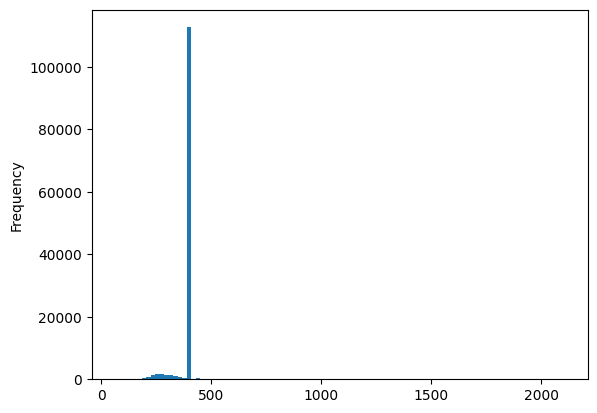

In [69]:
df.height.plot.hist(bins=100)

In [53]:
df_big = df.loc[(df.source == "chart-icpr2020") & (df.width > 900)]
df_big.head()

,img,img_path,width,height,label,original,caption,source,is_gt,split_set
179378,PMC2699053___pgen.1000549.s005.jpg,chart_icpr2020/ICPR2020_CHARTINFO_UB_PMC_TRAIN...,2999.0,2249.0,gra.his,horizontal_bar,,chart-icpr2020,True,TRAIN
179466,PMC3784563___pgen.1003821.s009.jpg,chart_icpr2020/ICPR2020_CHARTINFO_UB_PMC_TRAIN...,1695.0,1680.0,gra.his,horizontal_bar,,chart-icpr2020,True,TRAIN
180079,PMC2699053___pgen.1000549.s003.jpg,chart_icpr2020/ICPR2020_CHARTINFO_UB_PMC_TRAIN...,2999.0,2249.0,gra.lin,line,,chart-icpr2020,True,TRAIN
180947,PMC3920552___nihms509702f2.jpg,chart_icpr2020/ICPR2020_CHARTINFO_UB_PMC_TRAIN...,1050.0,712.0,gra.lin,line,,chart-icpr2020,True,TRAIN
180948,PMC3920552___nihms509702f3.jpg,chart_icpr2020/ICPR2020_CHARTINFO_UB_PMC_TRAIN...,1050.0,707.0,gra.lin,line,,chart-icpr2020,True,TRAIN


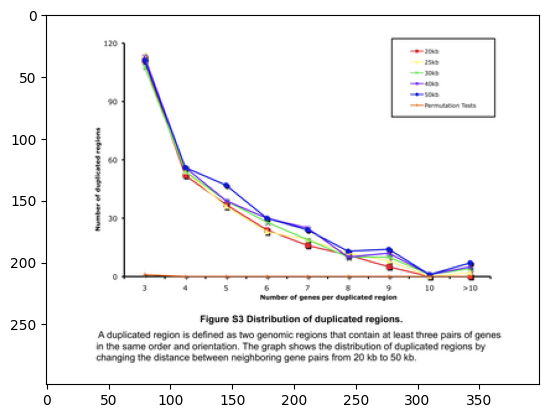

In [57]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

base_img_dir = Path("/home/jtt/Documents/datasets/curation_data")
# img_path = base_img_dir / "x_rays/kaggle_xrays_covid19_pneumonia/COVID19(33).jpg"
# img_path = base_img_dir / "chart_synthetic_1/train/100051.png"
img_path = base_img_dir / "chart_icpr2020/ICPR2020_CHARTINFO_UB_PMC_TRAIN_v1.21/images/line/PMC2699053___pgen.1000549.s003.jpg"


max_size = 400
img = Image.open(img_path)
img_orig = Image.open(img_path)
width, height = img.size

ratio = min(max_size/width, max_size/height)
new_width = width * ratio
new_height = height * ratio

img.thumbnail((new_width, new_height), Image.Resampling.LANCZOS)
img = img.convert("RGB")


img_to_show = img
npimg = np.asarray(img_to_show)
imgplot = plt.imshow(img_to_show)

In [33]:
img_path.stem

'COVID19(33)'

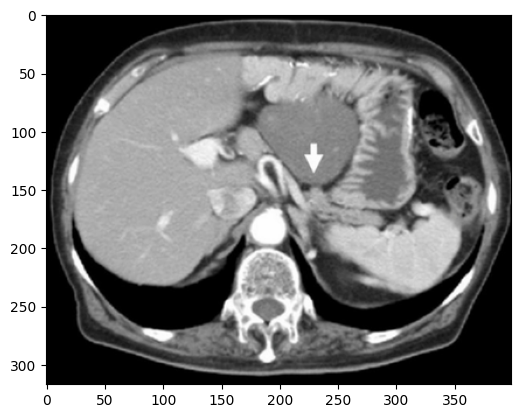

In [30]:
base_img_dir = Path("/home/jtt/Documents/datasets/curation_data")
img_path = base_img_dir / "subfigure-classification/OPENI_CT/PMC1481628_1477-7819-4-27-1.png"

max_size = 400
img = Image.open(img_path)
img_orig = Image.open(img_path)
width, height = img.size

ratio = min(max_size/width, max_size/height)
new_width = width * ratio
new_height = height * ratio

img.thumbnail((new_width, new_height), Image.Resampling.LANCZOS)

npimg = np.asarray(img)
imgplot = plt.imshow(img)

# img.save("./test.jpg", "JPEG")

In [4]:
import pandas as pd
from pathlib import Path


data_path = Path("./0/cord19_radiology_v1_2.parquet")
df2 = pd.read_parquet(data_path)



In [6]:
df2.groupby(["split_set"])["img"].count()

split_set
TEST       3672
TRAIN    139524
VAL        3671
Name: img, dtype: int64

In [60]:
data_path = Path("./raw_parquets/xrays_nih_400.parquet")
df = pd.read_parquet(data_path)

In [61]:
df.head()

,img,img_path,width,height,label,source,caption,is_gt,original
0,00002371_003.jpg,xrays/images_400/00002371_003.jpg,400,400,rad.xra,nih-chest,,True,xray
1,00002500_000.jpg,xrays/images_400/00002500_000.jpg,400,400,rad.xra,nih-chest,,True,xray
2,00008249_000.jpg,xrays/images_400/00008249_000.jpg,400,400,rad.xra,nih-chest,,True,xray
3,00017409_004.jpg,xrays/images_400/00017409_004.jpg,400,400,rad.xra,nih-chest,,True,xray
4,00003812_003.jpg,xrays/images_400/00003812_003.jpg,400,400,rad.xra,nih-chest,,True,xray
